## Fetching Dataset

In [1]:
from sklearn.datasets import fetch_openml

In [2]:
mnist=fetch_openml('mnist_784')

In [3]:
mnist

{'data':        pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  pixel9  \
 0           0       0       0       0       0       0       0       0       0   
 1           0       0       0       0       0       0       0       0       0   
 2           0       0       0       0       0       0       0       0       0   
 3           0       0       0       0       0       0       0       0       0   
 4           0       0       0       0       0       0       0       0       0   
 ...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
 69995       0       0       0       0       0       0       0       0       0   
 69996       0       0       0       0       0       0       0       0       0   
 69997       0       0       0       0       0       0       0       0       0   
 69998       0       0       0       0       0       0       0       0       0   
 69999       0       0       0       0       0       0       0       0       0   
 
      

In [4]:
x,y=mnist['data'],mnist['target']

In [5]:
import numpy as np
x = np.array(x)  # Convert to NumPy array
y = np.array(y)

In [6]:
x

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], shape=(70000, 784))

In [7]:
y

array(['5', '0', '4', ..., '4', '5', '6'], shape=(70000,), dtype=object)

In [8]:
x[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,  18,  18,
       126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 17

In [9]:
x.shape

(70000, 784)

In [10]:
y.shape

(70000,)

In [11]:
%matplotlib inline

In [12]:
some_digit=x[36001]
some_digit_image=some_digit.reshape(28,28) #Lets reshape to plot it

(np.float64(-0.5), np.float64(27.5), np.float64(27.5), np.float64(-0.5))

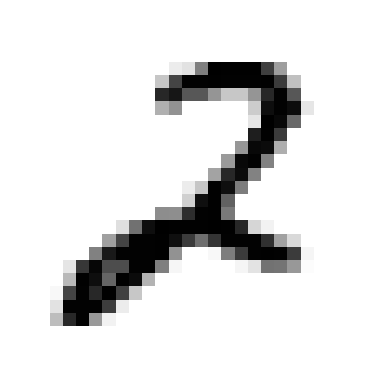

In [13]:
import matplotlib
import matplotlib.pyplot as plt
plt.imshow(some_digit_image,cmap=matplotlib.cm.binary,interpolation="nearest")
plt.axis("off")

In [14]:
y[36001]

'2'

In [15]:
x_train,x_test = x[:60000],x[60000:]
y_train,y_test = y[:60000],y[60000:]

In [16]:
shuffle_index=np.random.permutation(60000)
x_train,y_train = x_train[shuffle_index], y_train[shuffle_index]

## Creating a 2 detector

In [17]:
y_train=y_train.astype(np.int8)
y_test=y_test.astype(np.int8)
y_train_2=(y_train==2)
y_test_2=(y_test==2)

In [18]:
y_train

array([8, 8, 5, ..., 9, 1, 8], shape=(60000,), dtype=int8)

In [19]:
y_test_2

array([False,  True, False, ..., False, False, False], shape=(10000,))

In [20]:
from sklearn.linear_model import LogisticRegression

In [21]:
clf=LogisticRegression(solver='lbfgs')

In [22]:
clf.fit(x_train,y_train_2)

C:\Users\HP\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [23]:
clf.predict([some_digit])

array([ True])

In [24]:
from sklearn.model_selection import cross_val_score
a=cross_val_score(clf,x_train,y_train_2,cv=3,scoring="accuracy")

C:\Users\HP\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\HP\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.ht

In [25]:
a.mean()

np.float64(0.9778166666666667)

In [26]:
from sklearn.model_selection import cross_val_predict
y_train_pred=cross_val_predict(clf,x_train,y_train_2,cv=3)

C:\Users\HP\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\HP\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.ht

In [27]:
y_train_pred

array([False, False, False, ..., False, False, False], shape=(60000,))

## Calculating confusion matrix

In [28]:
from sklearn.metrics import confusion_matrix

In [29]:
confusion_matrix(y_train_2,y_train_pred)

array([[53535,   507],
       [  824,  5134]])

In [32]:
confusion_matrix(y_train_2,y_train_2) # This is the confusion matrix for perfect predictions.

array([[54042,     0],
       [    0,  5958]])

## Precision and Recall

In [33]:
from sklearn.metrics import precision_score,recall_score

In [34]:
precision_score(y_train_2,y_train_pred) #This is my precision score

0.9101223187378125

In [35]:
recall_score(y_train_2,y_train_pred) #This is my recall score

0.8616985565626049

## F1-Score

In [36]:
from sklearn.metrics import f1_score

In [37]:
f1_score(y_train_2,y_train_pred) #This is my f1 score

0.8852487283386499

## Precision Recall Curve

In [38]:
from sklearn.metrics import precision_recall_curve

In [44]:
y_scores=cross_val_predict(clf,x_train,y_train_2,cv=3,method="decision_function")

C:\Users\HP\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\HP\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.ht

In [45]:
y_scores

array([ -9.68524907, -10.79456401,  -5.62495053, ...,  -5.57341227,
        -3.38731481,  -2.04128138], shape=(60000,))

In [50]:
precisions,recalls,thresholds=precision_recall_curve(y_train_2,y_scores)

In [51]:
precisions

array([0.0993    , 0.09930166, 0.09930331, ..., 1.        , 1.        ,
       1.        ], shape=(60001,))

In [52]:
recalls

array([1.00000000e+00, 1.00000000e+00, 1.00000000e+00, ...,
       3.35683115e-04, 1.67841558e-04, 0.00000000e+00], shape=(60001,))

In [53]:
thresholds

array([-48.0229452 , -44.11562275, -43.93424468, ...,  17.45023104,
        18.48495744,  20.36445892], shape=(60000,))

## Plotting the Precision Recall Curve 

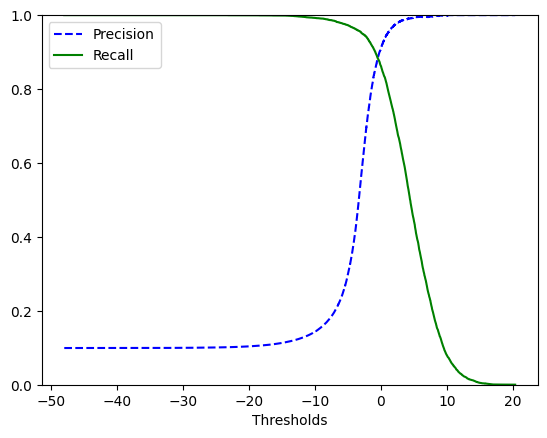

In [57]:
plt.plot(thresholds,precisions[:-1],"b--",label="Precision")
plt.plot(thresholds,recalls[:-1],"g-",label="Recall")
plt.xlabel("Thresholds")
plt.legend(loc="upper left")
plt.ylim([0,1])
plt.show()